##**COVID19 AND PNEUMONIA Classification using ResNet-50 Model**
This tutorial includes the implementaion of the deep learning model, ResNet-50 for multi-class classification on Chest X-ray (Covid-19 & Pneumonia) dataset. The following are the steps involved in this process.


1. Importing library
2. Data preparation
3. Data Augmantaion
4. Visualization of Data
5. Create the model
6. Training and Compailing the model
7. Evaluation of model


##**Importing library pakeges**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from keras.layers import Flatten , Dense, Dropout , MaxPool2D, Conv2D
from keras.models import Model
import matplotlib.pyplot as plt
import keras
import os
import numpy as np
import pandas as pd 
import seaborn as sns
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

##**Data preparation**

> dataset : https://www.kaggle.com/datasets/prashant268/chest-xray-covid19-pneumonia


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
IMAGE_SIZE = [224, 224]

data_path = "/content/gdrive/MyDrive/Data"
train_path = data_path +"/train"
test_path = data_path + "/test"
os.listdir(train_path)

##Data Augmantaion

In [ ]:

train_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input, 
                                    zoom_range= 0.2, 
                                    horizontal_flip= True, 
                                    shear_range= 0.2,
                                    
                                    )

train = train_data_gen.flow_from_directory(directory= train_path, 
                                           target_size=(224,224))

Found 5144 images belonging to 3 classes.


In [ ]:
test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input )

test = train_data_gen.flow_from_directory(directory= test_path , 
                                          target_size=(224,224), 
                                          shuffle= False)

Found 1288 images belonging to 3 classes.


In [ ]:
# Covid +ve X-Ray is represented by 0 and Normal is represented by 1 and Pneumonia is represented as 2
class_type = {0:'COVID19',  1 : 'NORMAL', 2 : 'PNEUMONIA'}

## **Visualization of dataset**

In [ ]:
# to visualize the images in the traing data denerator 

t_img , label = train.next()

In [ ]:
# function when called will prot the images 

def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

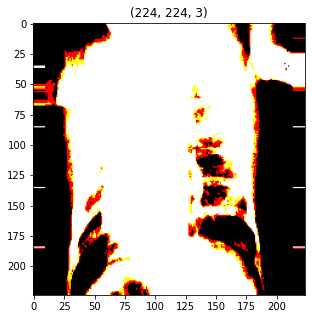

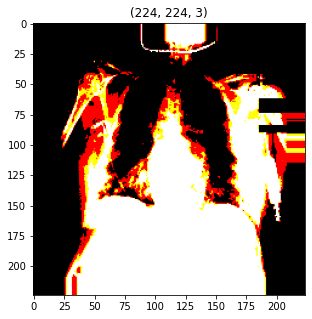

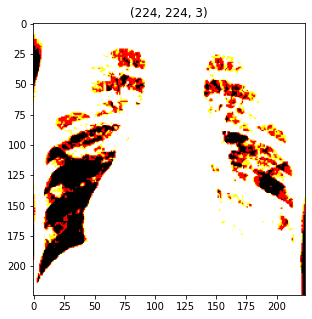

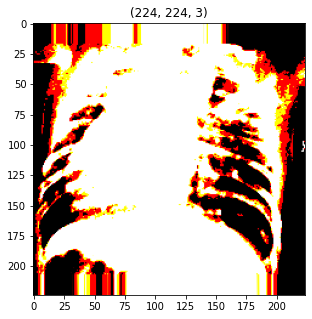

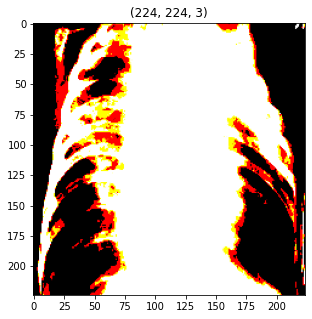

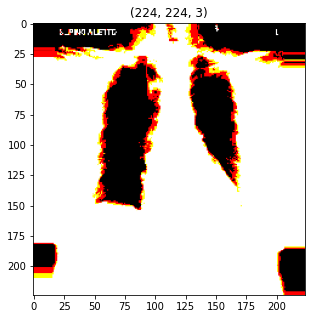

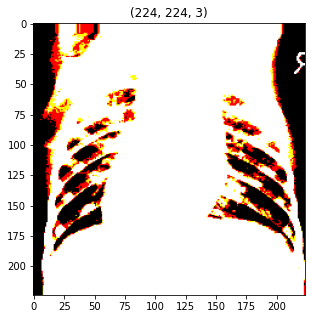

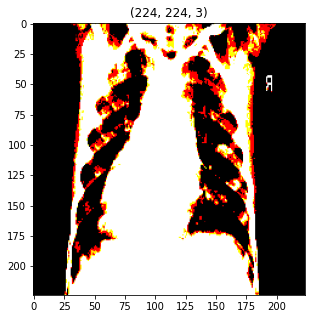

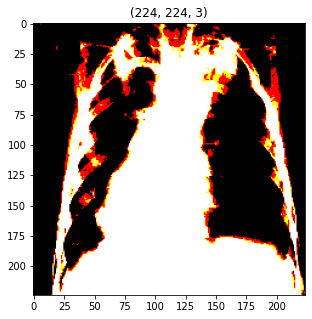

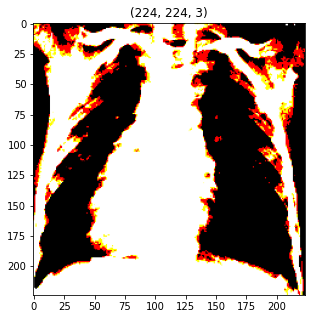

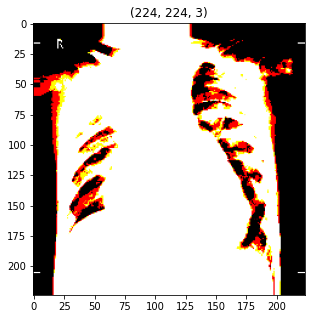

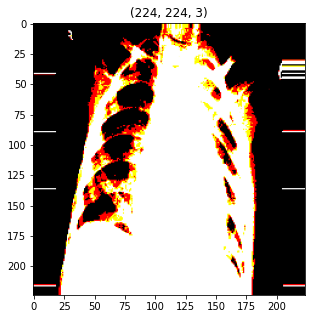

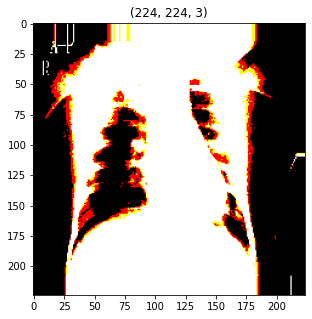

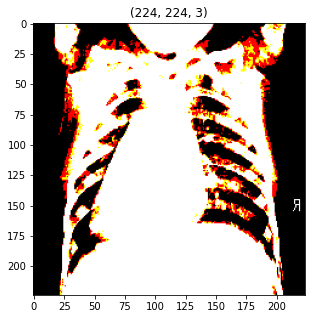

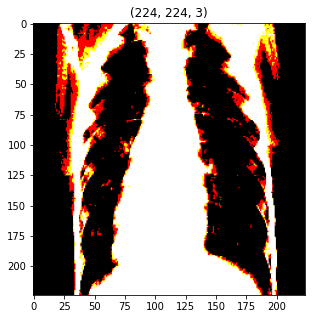

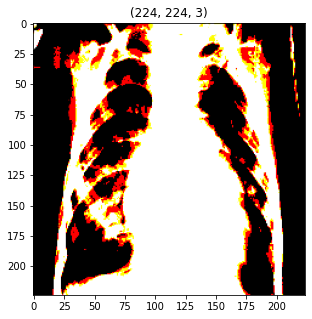

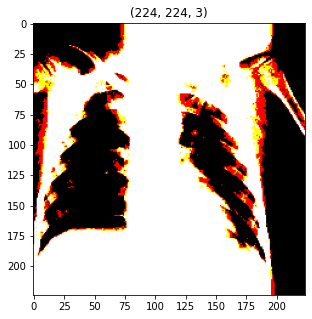

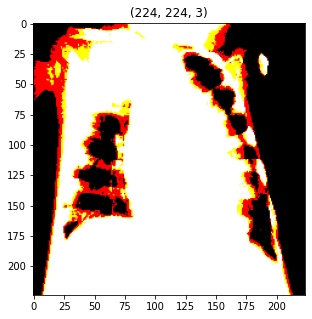

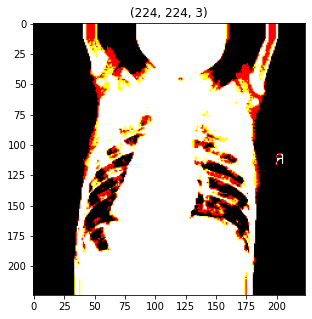

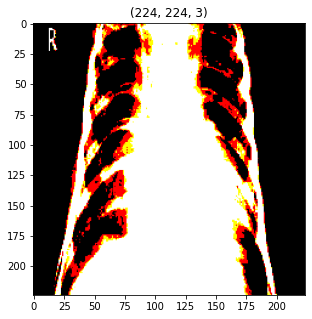

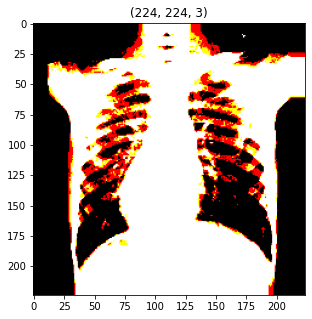

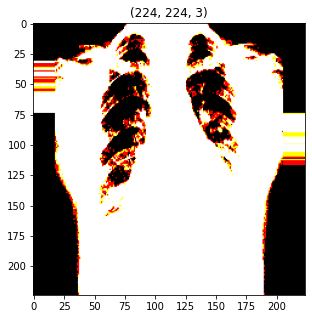

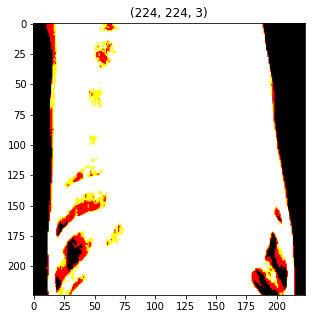

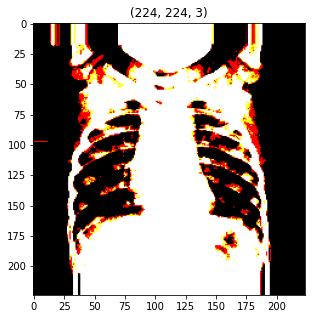

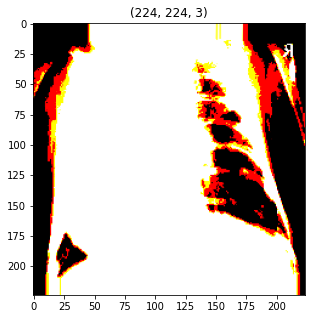

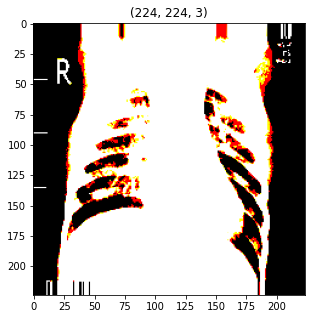

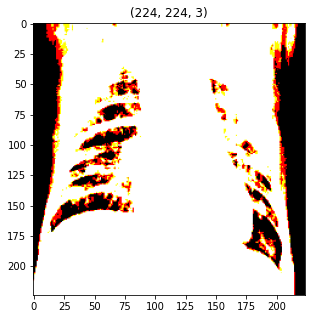

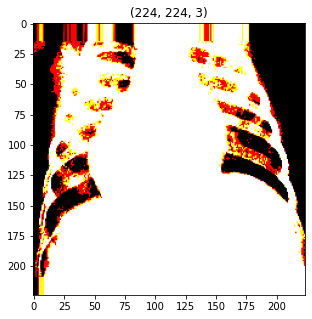

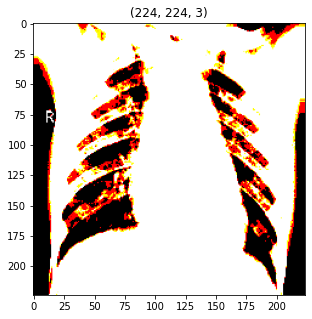

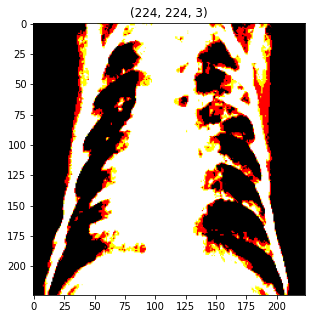

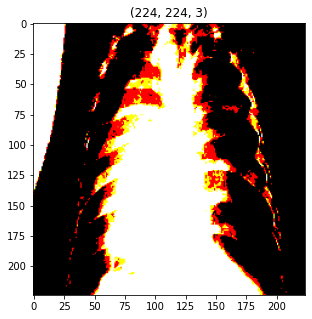

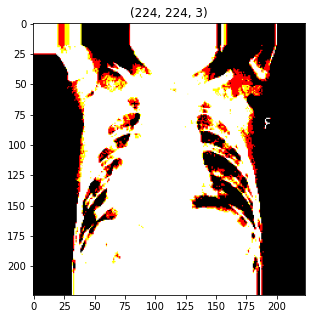

In [ ]:
# function call to plot the images 

plotImages(t_img, label)

##**Create the Model**

###The model that we are using here is ResNet50

The ResNet-50 model consists of 5 stages each with a convolution and Identity block. Each convolution block has 3 convolution layers and each identity block also has 3 convolution layers. The ResNet-50 has over 23 million trainable parameters

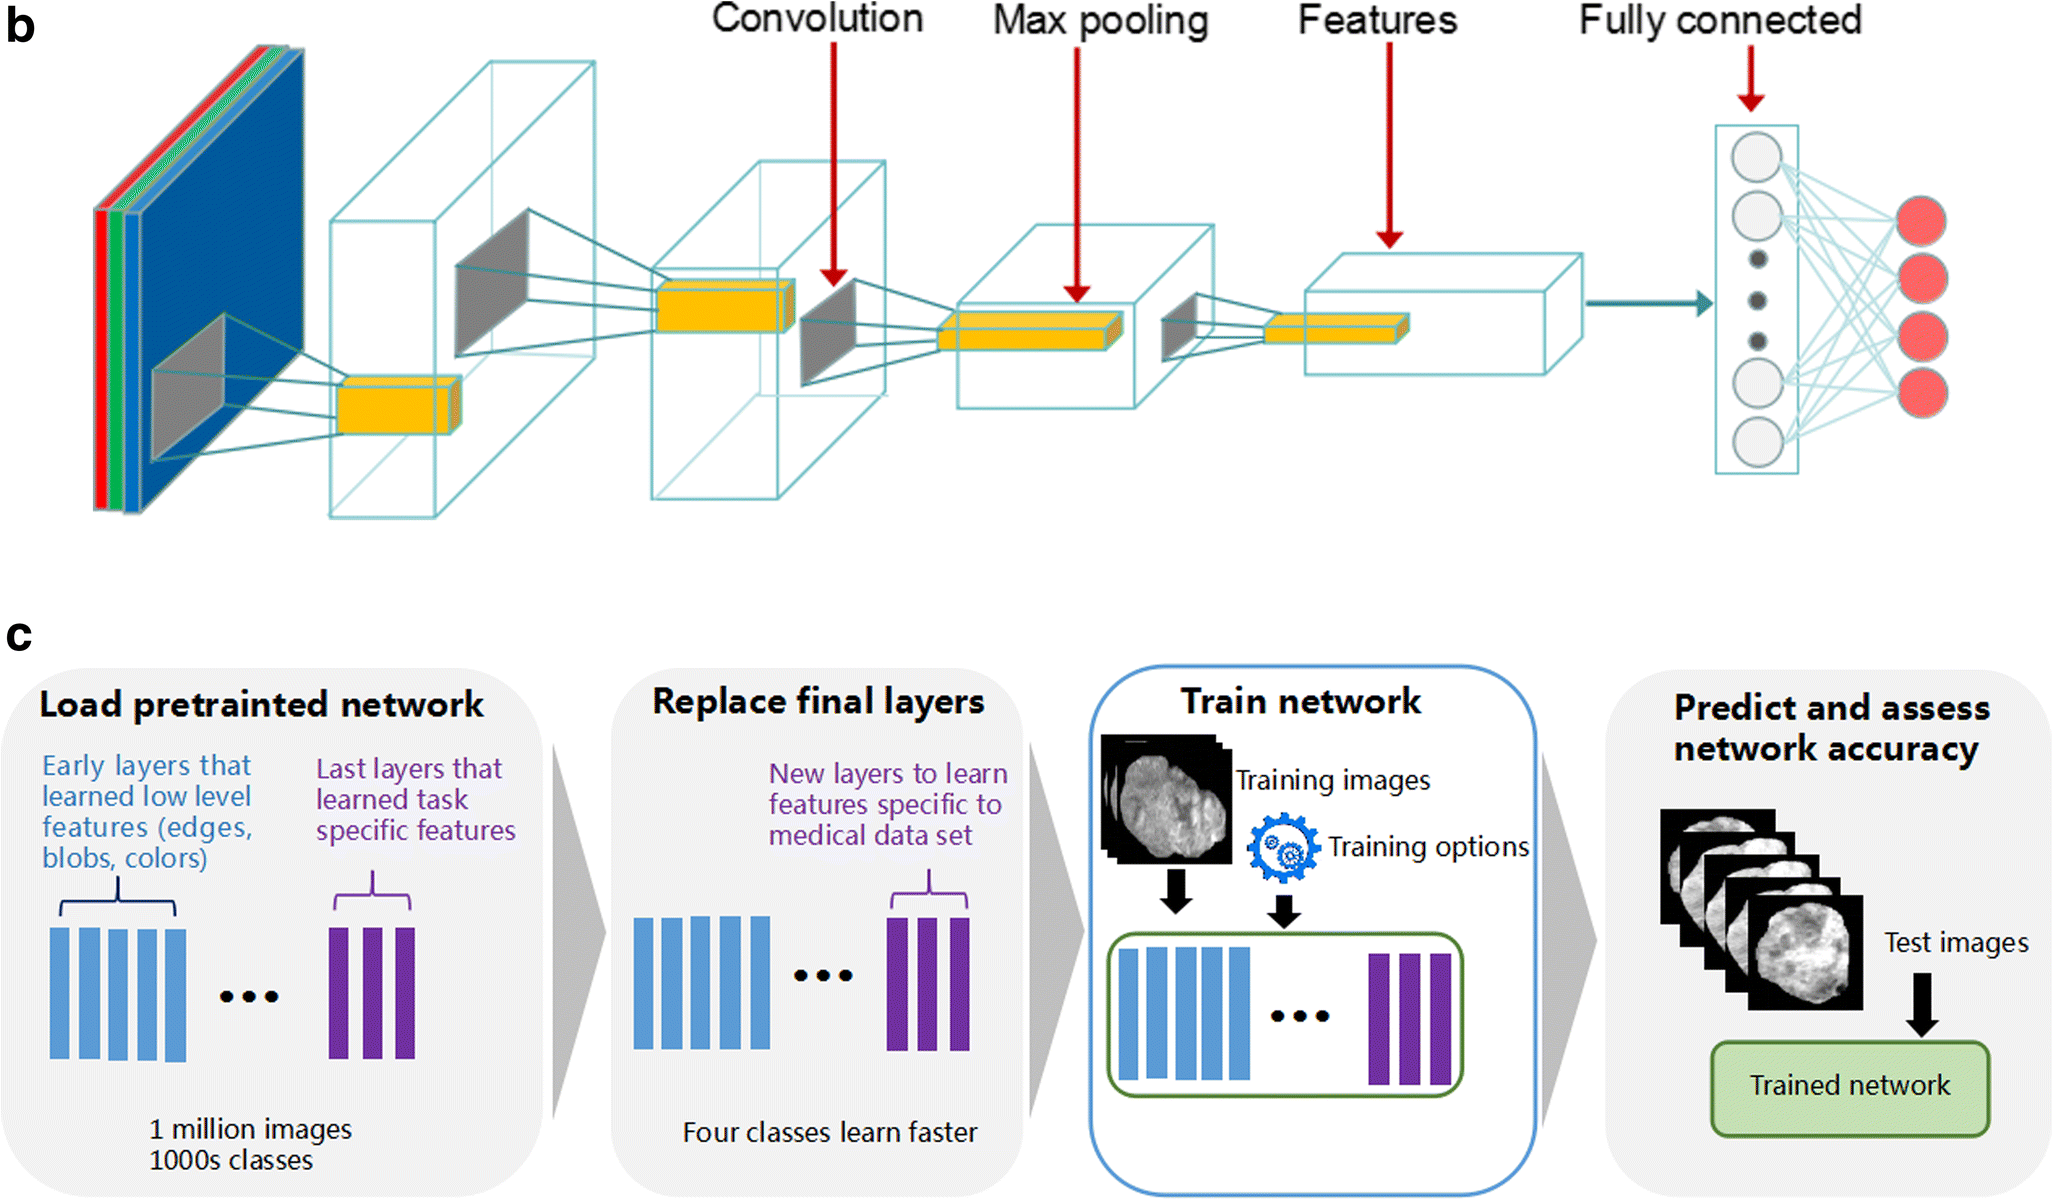

In [ ]:
res = ResNet50( input_shape=(224,224,3), include_top= False) # include_top will consider the new weights

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
for layer in res.layers:           # Dont Train the parameters again 
  layer.trainable = False

In [ ]:
x = Flatten()(res.output)
x = Dense(units=3 , activation='sigmoid', name = 'predictions' )(x)

In [ ]:
model = Model(res.input, x)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

##**Training and compiling the model**
Compiling the model involves defining the loss function, optimizer, and evaluation metric, while training uses the fit_generator method to train the model on the augmented image data. During training, the model generates predictions on the training set and updates its weights to minimize the loss function, while monitoring the model's performance on the validation set. The trained model can be saved and used to generate predictions on new data.

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
hist = model.fit_generator(train, steps_per_epoch= 100, epochs= 20, validation_data= test, validation_steps= 16)

<ipython-input-20-2fbaf2d5acd8>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train, steps_per_epoch= 100, epochs= 20, validation_data= test, validation_steps= 16)


Epoch 1/20
100/100 [==============================] - 142s 1s/step - loss: 3.0321 - accuracy: 0.8903 - val_loss: 1.2488 - val_accuracy: 0.9199
Epoch 2/20
100/100 [==============================] - 129s 1s/step - loss: 1.0912 - accuracy: 0.9477 - val_loss: 0.7364 - val_accuracy: 0.9609
Epoch 3/20
100/100 [==============================] - 132s 1s/step - loss: 1.3268 - accuracy: 0.9405 - val_loss: 1.0985 - val_accuracy: 0.9434
Epoch 4/20
100/100 [==============================] - 129s 1s/step - loss: 0.9704 - accuracy: 0.9575 - val_loss: 0.9270 - val_accuracy: 0.9512
Epoch 5/20
100/100 [==============================] - 130s 1s/step - loss: 1.3068 - accuracy: 0.9509 - val_loss: 1.1301 - val_accuracy: 0.9453
Epoch 6/20
100/100 [==============================] - 129s 1s/step - loss: 1.3572 - accuracy: 0.9536 - val_loss: 1.3345 - val_accuracy: 0.9453
Epoch 7/20
100/100 [==============================] - 131s 1s/step - loss: 0.9627 - accuracy: 0.9596 - val_loss: 1.6845 - val_accuracy: 0.9434

## Evaluation of model

In [ ]:
test_loss, test_acc = model.evaluate(test, verbose=1)
print('\naccuracy:', test_acc, '  loss: ',test_loss)

41/41 [==============================] - 41s 974ms/step - loss: 3.3039 - accuracy: 0.9394

accuracy: 0.9394409656524658   loss:  3.303877353668213


In [ ]:
predict = np.argmax(model.predict(test), axis=1)
predict

41/41 [==============================] - 42s 959ms/step


array([0, 0, 0, ..., 1, 2, 2])

In [ ]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

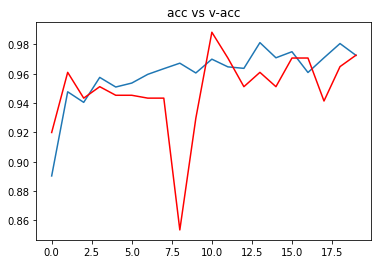

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

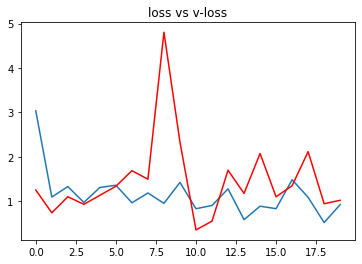

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# checking out the accurscy of our model 

acc = model.evaluate_generator(generator= test)[1] 
print(f"The accuracy of your model is = {acc} %")

<ipython-input-26-41e3d09acbc6>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(generator= test)[1]


The accuracy of your model is = 0.9417701959609985 %


In [ ]:
from keras.preprocessing import image
import tensorflow as tf

def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = tf.keras.utils.load_img(path, target_size=(224,224,3))
  img = tf.keras.utils.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )
  
  return img

1/1 [==============================] - 0s 39ms/step
The given X-Ray image is of type = NORMAL

1/1 [==============================] - 0s 57ms/step
The chances of image being Covid is : 0.0 percent

1/1 [==============================] - 0s 35ms/step
The chances of image being Normal is : 100.0 percent


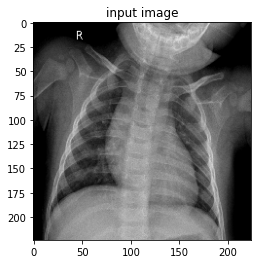

In [ ]:
path = "/content/Data/test/NORMAL/NORMAL(1269).jpg"       # you can add any image path

#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")


# to display the image  
plt.imshow(img[0]/255, cmap = "gray")
plt.title("input image")
plt.show()